In [ ]:
#shared folder
#https://drive.google.com/drive/folders/16KqOlY0Hnnk4xDJMn3H_NG7aR-TYcE03?usp=share_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/ICV/Project/training_checkpoints'

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### Model compilation

In [4]:
img_shape = (228, 228, 3)

pre_trained = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [5]:
x = pre_trained.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(101)(x)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=10,
        verbose=2,
        restore_best_weights=True),
]

model = tf.keras.Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

### Loading Weights


In [7]:
# Best result was produced on 5th epoch of the last training session
model.load_weights(f'{path}/ckpt_5')

### Label Prediction

In [8]:
def predict_image(filename, classes, model):
    img_ = tf.keras.preprocessing.image.load_img(filename, target_size=(228, 228))
    img_array = tf.keras.preprocessing.image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    print(index)
    plt.title(f"Prediction - {classes[index]}", size=18, color='red')
    plt.imshow(img_array)

def get_labels(path):
    with open(path, 'r') as f:
      labels = f.read().split('\n')
      labels.remove('')
      f.close()
    return labels

In [9]:
labels = get_labels(f'{path}/label.labels.txt')
print(labels)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

1/1 [==============================] - 2s 2s/step
55


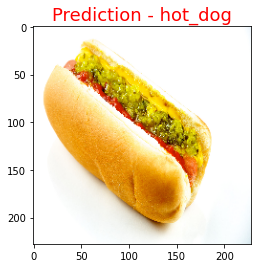

In [10]:
predict_image(f'{path}/hotdog.jpg', labels, model)

1/1 [==============================] - 0s 163ms/step
59


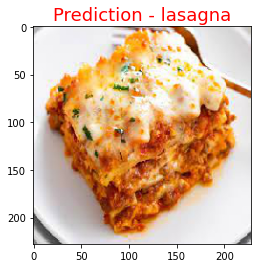

In [11]:
predict_image(f'{path}/lasagna.jpg', labels, model)

1/1 [==============================] - 0s 167ms/step
76


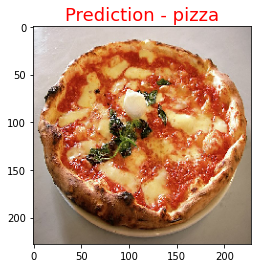

In [12]:
predict_image(f'{path}/pizza.jpg', labels, model)

1/1 [==============================] - 0s 161ms/step
53


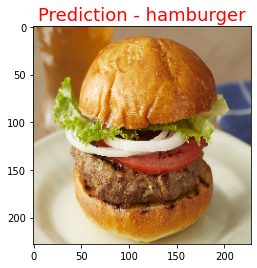

In [13]:
predict_image(f'{path}/burger.jpg', labels, model)